<a href="https://colab.research.google.com/github/tokuton1024/Kaggle/blob/master/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import random
import time
import os
import gc

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [3]:
INPUT = "/content/drive/My Drive/Tabular Playground Series - Sep 2021/Input/"

train = pd.read_csv(INPUT + "train.csv")
test = pd.read_csv(INPUT + "test.csv")

#空白削除

In [16]:
features = [col for col in test.columns if 'f' in col]
train[features] = train[features].fillna(train[features].mean())
test[features] = test[features].fillna(test[features].mean())

In [19]:
train.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim,n_missing,std
count,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,9.579190e+05,957919.000000,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,9.579190e+05,9.579190e+05,957919.000000,957919.000000,957919.000000,9.579190e+05,9.579190e+05,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,...,9.579190e+05,957919.000000,9.579190e+05,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05
mean,478959.000000,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,3.771642e+05,1.806054e+15,5323.442367,0.729518,1.844436e+09,0.247759,6.999152,0.019394,444.804439,6.892520,4.491982,22.448660,203.782031,61070.567499,2.269597,87.166891,0.341240,414.983986,3.379988e+12,1.254164e+12,2.256887e+06,0.329054,7.882455,0.394211,1.344700e+05,3.579055e+05,-0.000005,2.782318e+16,185.485192,406.072571,1.768743,1981.074344,...,1.053811e+11,152.850973,6.128694e+06,635.301741,3.251414e+10,26.598567,207.260994,3805.100719,6.733556,0.366754,4868.608259,132.264261,0.821190,13.120677,3849.687894,0.999970,1.415684e+13,1.683151,0.425840,20.213776,3.215760e+05,548.647493,3855.616303,0.178027,0.160832,0.014196,1.671873e+09,0.398622,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,4.276905e+16,3959.204669,0.559267,0.498492,1.900768,5.748994e+15
std,276527.540591,0.043216,0.145087,6363.741104,0.210777,0.144169,2.106501,1265.910897,3.426495e+05,2.316543e+15,9988.057514,1.483446,2.108107e+09,0.100336,6.568651,0.101052,626.217132,1.701863,3.867925,14.491485,278.738892,89131.821237,0.888827,37.049681,1.630131,312.263969,5.610004e+12,1.629440e+12,2.285479e+06,0.430356,5.891949,0.775507,2.020030e+05,4.589105e+05,0.001522,3.424961e+16,696.118883,312.183250,0.584220,1942.716101,...,9.815782e+10,226.022275,8.697289e+06,578.744580,3.044180e+10,25.250290,156.926024,3504.031538,3.133048,0.145223,8359.991632,109.166608,0.706827,12.636080,6385.821104,0.001522,1.627243e+13,0.706256,0.281342,19.459856,3.251319e+05,857.110056,6617.130680,0.122324,0.140462,0.016128,1.860653e+09,0.295645,18.428838,0.888517,45.213240,10.008309,91687.140074,0.114021,6.677435e+16,3130.508661,0.405170,0.499998,2.026843,6.116551e+15
min,0.000000,-0.149910,-0.019044,-9421.700000,-0.082122,-0.006990,-12.791000,-224.800000,-2.984300e+04,-1.153300e+15,-26404.000000,-8.086300,-4.081000e+08,-0.103800,-0.853760,-0.335660,-116.880000,-3.664500,-0.066527,-4.422500,-58.834000,-84079.000000,-6.009400,-20.514000,-5.735200,-71.502000,-6.956700e+11,-9.384200e+11,-4.706000e+05,-0.005659,-0.529990,-3.813500,-3.496500e+05,-6.055900e+05,-0.003881,-2.068900e+16,-2414.300000,-40.881000,0.546100,-433.700000,...,-7.345700e+10,-28.752000,-2.992000e+06,-74.545000,-5.949500e+09,-7.616400,-22.576000,-296.780000,-0.257570,-0.012238,-12829.000000,-12.922000,-3.293300,-1.352400,-7764.300000,0.996100,-5.714600e+12,0.608200,-0.034559,-4.294900,-2.277700e+05,-222.210000,-11581.000000,-0.029027,-0.066726,-0.007535,-5.877000e+08,-0.042355,-105.860000,0.277040,-27.6

In [ ]:
Umap_Train = train.iloc[:,1:-1].to_numpy()

#UMAPの参照：https://qiita.com/odanny/items/06ab88353bcee7bf6aa7

     |████████████████████████████████| 80 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 14.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=d16aa801dad229d2404d7ee8babcdad8f087ab3b2cd0f76660c403297957f587
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=845436d5323825b310c35d928a93a000b9ed403cd96d8f12a2795fb9ba2d7530
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


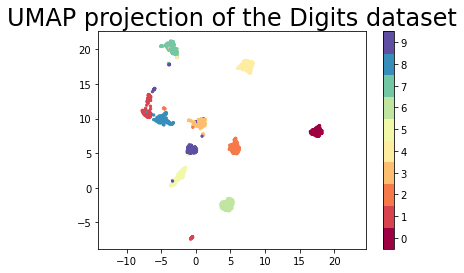

In [4]:
!pip install umap-learn

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import umap

# Digitsで試す
digits = load_digits()

# umapで2次元に削減
reducer = umap.UMAP(random_state=42)
reducer.fit(Umap_Train)
embedding = reducer.transform(Umap_Train)

# plot
plt.scatter(embedding[:, 0], embedding[:, 1], c=train.iloc[:0], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

ValueError: ignored